In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
plt.rcParams['animation.html'] = 'html5'
import numpy as np
import scipy as sp
import scipy.integrate
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from spectral import *
np.set_printoptions(linewidth=120)

In [2]:
L, Hy, Hz = 1600, 10, 10 # millimeters
rho = 1.06; young = 3.7; nu = 0.34; l = -18.9; m = -13.3; n = -10.0 # PS

In [3]:
tau = 4
t0 = -8*tau
t_max = 5/12*L
dt = 1.0
F0 = 0.3
T = np.arange(t0, t_max + dt/2, dt)

In [4]:
R = np.sqrt(Hy**2 + Hz**2)
def u_reg(A, x, t):
    beta = 3*young + 2*l*(1-2*nu)**3 + 4*m*(1+nu)**2*(1-2*nu) + 6*n*nu**2
    d = beta / 2 / rho
    b = nu**2 * R**2 / 2
    c = np.sqrt(young/rho)
    sol_len = np.sqrt(A*d/(2*b*(3*c**2 + 2*A*d)))
    sol_vel = np.sqrt(c**2 + 2/3*A*d)
    return A * np.cosh(sol_len*(x - t*sol_vel))**(-2)

In [10]:
T[699]

667.0

In [16]:
u = np.load('strain_L=1600.npy')
A = max(u[:,699])
x = np.linspace(0, L, 2000)
u_reg_arr = np.zeros_like(u)
for k in range(u.shape[1]):
    u_reg_arr[:, k] = -u_reg(-A, x, T[k])

In [13]:
u_reg_arr.shape

(2000, 700)

In [17]:
fig, ax = plt.subplots(figsize=(8, 3), tight_layout=True)
plt.xlim(0, L)
plt.ylim(-0.02, 0.1)
line, = ax.plot([], [])
line2, = ax.plot([], [])
time_template = 'time = %.1f us'
time_text = ax.text(0.75, 0.9, '', transform=ax.transAxes)
plt.xlabel(r'$x$, mm')
plt.ylabel(r'$-u(x, 0, 0)$')
plt.minorticks_on()
plt.close()

def animate(k):
    x = np.linspace(0, L, 2000)
    line.set_data(x, u[:, k])
    line2.set_data(x, -u_reg(-A, x, T[k]))
    time_text.set_text(time_template % T[k])
    return line, line2, time_text

anim = animation.FuncAnimation(fig, animate, 
                               frames=len(T), interval=50, blit=True)

In [18]:
anim

In [66]:
x = np.linspace(0, L, 2000)

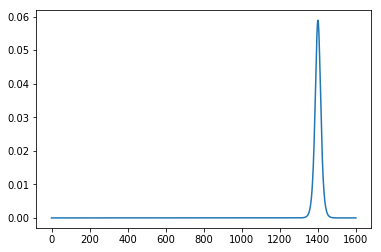

In [73]:
plt.plot(x, -u_reg(-A, x, 700))